# Trabalho 1 - Regressão Multivariável
## Estimativa de preços de diamantes de acordo com suas características.

UFRJ/POLI/DEL - Introdução ao Aprendizado de Máquina (EEL891) <br>
Prof. Heraldo Almeira - Julho de 2019 <br>
Maria Gabriella Andrade Felgas

### Importando as Bibliotecas e Ferramentas

In [1]:
# Importando as bibliotecas e setando o ambiente de desenvolvimento

# Bibliotecas para processamento e manipulacao dos dados
import numpy as np
import pandas as pd

# Bibliotecas para visualizacao dos dados
import matplotlib.pyplot as plt
import seaborn as sns


# Bibliotecas dos modelos de treinamento
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor,\
                             GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


# Bibliotecas de ferramentas e métricas
from sklearn.preprocessing import Imputer, Normalizer, scale, MinMaxScaler, StandardScaler, Imputer, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error 

### Análise e Tratamento de Dados

#### Importação de Dados

In [2]:
# Carregando os dados de treino como dataframe
# e observando os atributos

train = pd.read_csv('data/train.csv')
train.head()

,id,carat,cut,color,clarity,x,y,z,depth,table,price
0,20000,0.35,Very Good,G,VVS2,4.44,4.48,2.80,62.8,58.0,798
1,20001,0.70,Ideal,F,SI1,5.66,5.69,3.55,62.6,56.0,2089
2,20002,0.32,Ideal,F,VVS1,4.42,4.38,2.70,61.4,56.0,990
3,20003,0.30,Ideal,H,VVS2,4.32,4.35,2.67,61.7,54.2,631
4,20004,0.33,Premium,I,VVS2,4.41,4.47,2.76,62.2,59.0,579


In [3]:
train.shape

(33940, 11)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33940 entries, 0 to 33939
Data columns (total 11 columns):
id         33940 non-null int64
carat      33940 non-null float64
cut        33940 non-null object
color      33940 non-null object
clarity    33940 non-null object
x          33940 non-null float64
y          33940 non-null float64
z          33940 non-null float64
depth      33940 non-null float64
table      33940 non-null float64
price      33940 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.8+ MB


In [5]:
# Setando o index do arquivo como arquivo do dataframe

train = train.set_index('id')
train.head()

,carat,cut,color,clarity,x,y,z,depth,table,price
id,,,,,,,,,,
20000,0.35,Very Good,G,VVS2,4.44,4.48,2.80,62.8,58.0,798
20001,0.70,Ideal,F,SI1,5.66,5.69,3.55,62.6,56.0,2089
20002,0.32,Ideal,F,VVS1,4.42,4.38,2.70,61.4,56.0,990
20003,0.30,Ideal,H,VVS2,4.32,4.35,2.67,61.7,54.2,631
20004,0.33,Premium,I,VVS2,4.41,4.47,2.76,62.2,59.0,579


In [6]:
# Carregando os dados de teste como dataframe

test = pd.read_csv('data/test.csv')
test.head()

,id,carat,cut,color,clarity,x,y,z,depth,table
0,0,1.82,Premium,G,SI1,7.75,7.68,4.84,62.7,58.0
1,1,1.11,Very Good,H,SI1,6.63,6.65,4.11,61.9,58.0
2,2,0.52,Ideal,D,VVS2,5.19,5.22,3.20,61.5,55.0
3,3,1.05,Ideal,I,VS2,6.52,6.50,4.05,62.2,56.0
4,4,0.70,Ideal,I,VVS2,5.63,5.68,3.51,62.1,58.0


In [7]:
test.shape

(20000, 10)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
id         20000 non-null int64
carat      20000 non-null float64
cut        20000 non-null object
color      20000 non-null object
clarity    20000 non-null object
x          20000 non-null float64
y          20000 non-null float64
z          20000 non-null float64
depth      20000 non-null float64
table      20000 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [9]:
# Setando o index do arquivo como arquivo do dataframe

test = test.set_index('id')
test.head()

,carat,cut,color,clarity,x,y,z,depth,table
id,,,,,,,,,
0,1.82,Premium,G,SI1,7.75,7.68,4.84,62.7,58.0
1,1.11,Very Good,H,SI1,6.63,6.65,4.11,61.9,58.0
2,0.52,Ideal,D,VVS2,5.19,5.22,3.20,61.5,55.0
3,1.05,Ideal,I,VS2,6.52,6.50,4.05,62.2,56.0
4,0.70,Ideal,I,VVS2,5.63,5.68,3.51,62.1,58.0


In [10]:
# Verificando se existem valores nulos para o conjunto de treino

train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
depth      0
table      0
price      0
dtype: int64

In [11]:
# Verificando se existem valores nulos para o conjunto de teste

test.isnull().sum()

carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
depth      0
table      0
dtype: int64

In [12]:
# Verificando os detalhes de cada caracteristica

train.describe()

,carat,x,y,z,depth,table,price
count,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000
mean,0.796249,5.727926,5.730563,3.535916,61.746491,57.467664,3920.022864
std,0.472866,1.119282,1.120279,0.693763,1.425570,2.237116,3980.229999
min,0.200000,0.000000,0.000000,0.000000,43.000000,44.000000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,952.000000
50%,0.700000,5.700000,5.710000,3.520000,61.800000,57.000000,2395.000000
75%,1.040000,6.540000,6.530000,4.030000,62.500000,59.000000,5294.000000
max,5.010000,10.740000,31.800000,6.980000,79.000000,95.000000,18823.000000


In [13]:
# Verificando os detalhes de cada caracteristica

test.describe()

,carat,x,y,z,depth,table
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,0.800809,5.736641,5.741252,3.543516,61.75435,57.439400
std,0.475947,1.125961,1.178295,0.725497,1.44453,2.229972
min,0.200000,0.000000,0.000000,0.000000,44.00000,43.000000
25%,0.400000,4.720000,4.730000,2.910000,61.00000,56.000000
50%,0.700000,5.700000,5.710000,3.530000,61.80000,57.000000
75%,1.050000,6.550000,6.540000,4.040000,62.50000,59.000000
max,3.670000,9.860000,58.900000,31.800000,79.00000,79.000000


Como x, y e z são variáveis relacionadas às dimensões de cada diamante, não faz sentido que nenhuma delas seja igual a 0. Assim, é necessário retirar estes dados do conjunto de treino para que o modelo não seja prejudicado.

In [14]:
# Para realizar este processamento, redefine-se o conjunto de treino como o que corresponde a condicao a seguir

train = train[(train[['x','y','z']] != 0).all(axis=1)]

# Para confirmar
train.describe()

,carat,x,y,z,depth,table,price
count,33929.000000,33929.000000,33929.000000,33929.000000,33929.000000,33929.00000,33929.000000
mean,0.796061,5.728073,5.730722,3.537062,61.746754,57.46752,3918.401692
std,0.472740,1.117848,1.118862,0.690948,1.425311,2.23705,3978.347387
min,0.200000,3.730000,3.680000,1.070000,43.000000,44.00000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.00000,952.000000
50%,0.700000,5.690000,5.710000,3.520000,61.800000,57.00000,2394.000000
75%,1.040000,6.530000,6.530000,4.030000,62.500000,59.00000,5293.000000
max,5.010000,10.740000,31.800000,6.980000,79.000000,95.00000,18823.000000


Agora, verifica-se a distribuição de cada um dos atributos numéricos do dataset, verificando seus padrões e outliers.

#### Tratamento dos Dados

##### Preço

###### Observação

In [15]:
# Analisando as caracteristicas do atributo

train['price'].describe()

count    33929.000000
mean      3918.401692
std       3978.347387
min        326.000000
25%        952.000000
50%       2394.000000
75%       5293.000000
max      18823.000000
Name: price, dtype: float64

Skewness: 1.6292963158992595
Kurtosis: 2.224956771069901


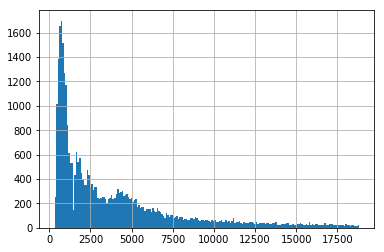

In [16]:
# Definindo os valores de Skewness e Kurtosis para analisar
# a simetria e quantidade de outliers respectivamente

print('Skewness: {}'.format(train['price'].skew()))
print('Kurtosis: {}'.format(train['price'].kurt()))

# Plotando o histograma

train['price'].hist(bins = 200)
plt.show()

###### Removendo os Outliers

Como o preço é o alvo a ser considerado no treinamento do modelo, decidi manter todos os dados por enquanto.

##### Carat

###### Observação

In [17]:
# Analisando as caracteristicas do atributo

train['carat'].describe()

count    33929.000000
mean         0.796061
std          0.472740
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

Skewness: 1.1315062541047431
Kurtosis: 1.4017522300920007


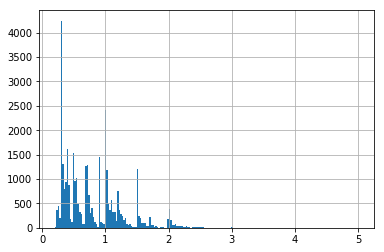

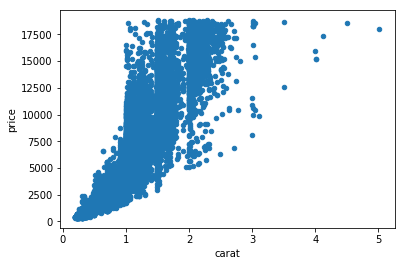

In [18]:
# Definindo os valores de Skewness e Kurtosis para analisar
# a simetria e quantidade de outliers respectivamente

print('Skewness: {}'.format(train['carat'].skew()))
print('Kurtosis: {}'.format(train['carat'].kurt()))


# Plotando o histograma

train['carat'].hist(bins = 200)
plt.show() 


# Plotando o diagrama de dispersão

train.plot.scatter(x = 'carat', y = 'price')
plt.show()

###### Removendo os Outliers

De acordo com a observação do gráfico acima, defino os outliers como sendo os pontos fora da distribuição padrão, ou seja, com carat acima de 3.

Skewness: 1.0434826993380113
Kurtosis: 0.7239066122278746


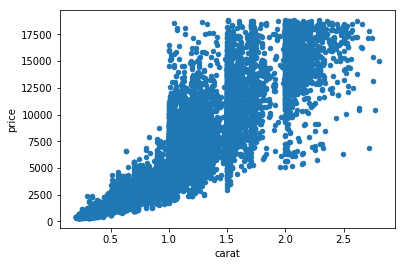

In [19]:
train = train[train['carat'] < 3]

# Definindo os valores de Skewness e Kurtosis para analisar
# a simetria e quantidade de outliers respectivamente apos remocao

print('Skewness: {}'.format(train['carat'].skew()))
print('Kurtosis: {}'.format(train['carat'].kurt()))

# Plotando o diagrama de dispersão novamente

train.plot.scatter(x = 'carat', y = 'price')
plt.show()

##### x

###### 2.2.3.1. Observação

In [20]:
# Analisando as caracteristicas do atributo

train['x'].describe()

count    33905.000000
mean         5.725416
std          1.113702
min          3.730000
25%          4.710000
50%          5.690000
75%          6.530000
max          9.130000
Name: x, dtype: float64

Skewness: 0.38096893827381195
Kurtosis: -0.7557159767836925


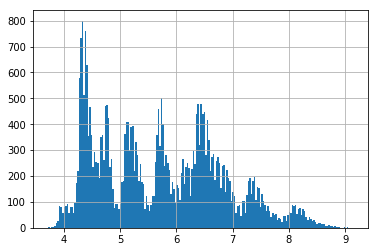

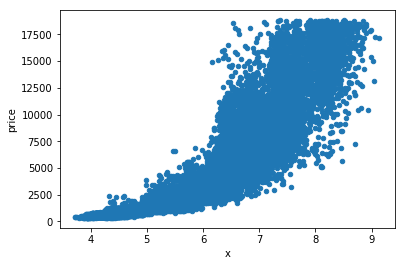

In [21]:
# Definindo os valores de Skewness e Kurtosis para analisar
# a simetria e quantidade de outliers respectivamente

print('Skewness: {}'.format(train['x'].skew()))
print('Kurtosis: {}'.format(train['x'].kurt()))

# Plotando o histograma

train['x'].hist(bins = 200)
plt.show() 


# Plotando o diagrama de dispersão

train.plot.scatter(x = 'x', y = 'price')
plt.show()

###### Removendo os Outliers

De acordo com a observação do gráfico acima, não é necessário remover outliers para este atributo.

##### y

###### Observação

In [22]:
# Analisando as caracteristicas do atributo

train['y'].describe()

count    33905.000000
mean         5.728122
std          1.114912
min          3.680000
25%          4.720000
50%          5.710000
75%          6.530000
max         31.800000
Name: y, dtype: float64

Skewness: 0.7429266670424157
Kurtosis: 7.986140142359535


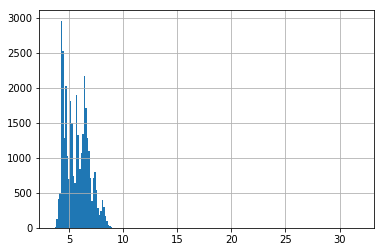

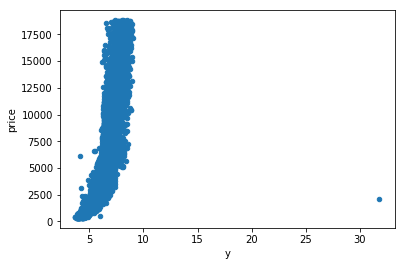

In [23]:
# Definindo os valores de Skewness e Kurtosis para analisar
# a simetria e quantidade de outliers respectivamente

print('Skewness: {}'.format(train['y'].skew()))
print('Kurtosis: {}'.format(train['y'].kurt()))

# Plotando o histograma

train['y'].hist(bins = 200)
plt.show() 


# Plotando o diagrama de dispersão

train.plot.scatter(x = 'y', y = 'price')
plt.show()

###### Removendo os Outliers

De acordo com a observação do gráfico acima, defino os outliers como sendo os pontos fora da distribuição padrão, ou seja, com y acima de 10.

Skewness: 0.3768396650262421
Kurtosis: -0.763022985038257


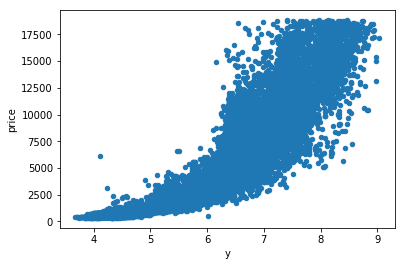

In [24]:
train = train[train['y'] < 10]

# Definindo os valores de Skewness e Kurtosis para analisar
# a simetria e quantidade de outliers respectivamente apos remocao

print('Skewness: {}'.format(train['y'].skew()))
print('Kurtosis: {}'.format(train['y'].kurt()))

# Plotando o diagrama de dispersão novamente

train.plot.scatter(x = 'y', y = 'price')
plt.show()

##### z

###### Observação

In [25]:
# Analisando as caracteristicas do atributo

train['z'].describe()

count    33904.000000
mean         3.535314
std          0.688107
min          1.070000
25%          2.910000
50%          3.520000
75%          4.030000
max          6.160000
Name: z, dtype: float64

Skewness: 0.3746831555000122
Kurtosis: -0.7513303284052073


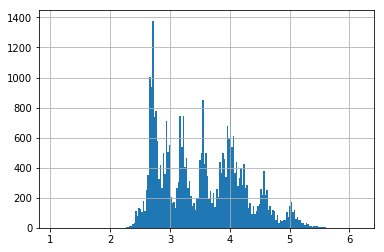

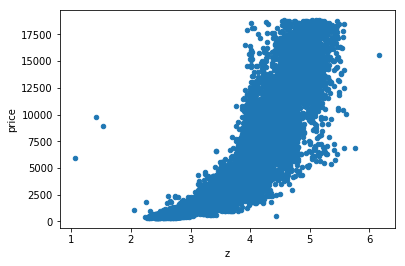

In [26]:
# Definindo os valores de Skewness e Kurtosis para analisar
# a simetria e quantidade de outliers respectivamente

print('Skewness: {}'.format(train['z'].skew()))
print('Kurtosis: {}'.format(train['z'].kurt()))

# Plotando o histograma

train['z'].hist(bins = 200)
plt.show() 


# Plotando o diagrama de dispersão

train.plot.scatter(x = 'z', y = 'price')
plt.show()

###### Removendo os Outliers

De acordo com a observação do gráfico acima, defino os outliers como sendo os pontos fora da distribuição padrão, ou seja, com z abaixo de 2 e acima de 5.5.

Skewness: 0.3708158357863582
Kurtosis: -0.7773618059199912


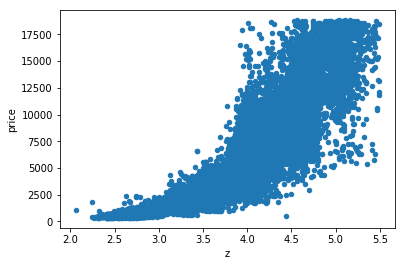

In [27]:
train = train[train['z'] > 2]
train = train[train['z'] < 5.5]

# Definindo os valores de Skewness e Kurtosis para analisar
# a simetria e quantidade de outliers respectivamente apos remocao

print('Skewness: {}'.format(train['z'].skew()))
print('Kurtosis: {}'.format(train['z'].kurt()))

# Plotando o diagrama de dispersão novamente

train.plot.scatter(x = 'z', y = 'price')
plt.show()

##### depth

###### Observação

In [28]:
# Analisando as caracteristicas do atributo

train['depth'].describe()

count    33885.000000
mean        61.744501
std          1.421565
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

Skewness: -0.1510217528260398
Kurtosis: 5.4733763627783585


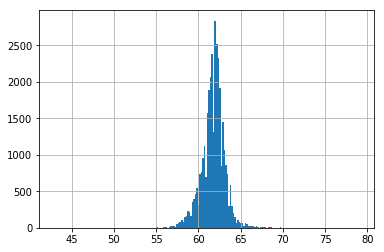

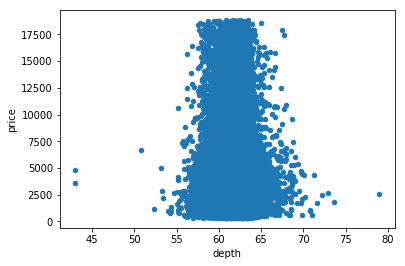

In [29]:
# Definindo os valores de Skewness e Kurtosis para analisar
# a simetria e quantidade de outliers respectivamente

print('Skewness: {}'.format(train['depth'].skew()))
print('Kurtosis: {}'.format(train['depth'].kurt()))

# Plotando o histograma

train['depth'].hist(bins = 200)
plt.show() 


# Plotando o diagrama de dispersão

train.plot.scatter(x = 'depth', y = 'price')
plt.show()

###### Removendo os Outliers

De acordo com a observação do gráfico acima, defino os outliers como sendo os pontos fora da distribuição padrão, ou seja, com depth entre 56 e 67.

Skewness: -0.31580950032339233
Kurtosis: 1.370198069962338


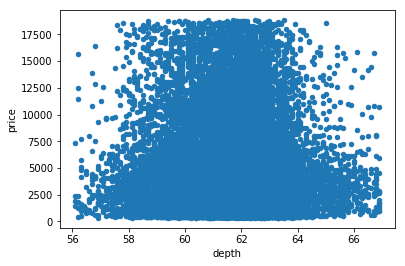

In [30]:
train = train[train['depth'] > 56]
train = train[train['depth'] < 67]

# Definindo os valores de Skewness e Kurtosis para analisar
# a simetria e quantidade de outliers respectivamente apos remocao

print('Skewness: {}'.format(train['depth'].skew()))
print('Kurtosis: {}'.format(train['depth'].kurt()))

# Plotando o diagrama de dispersão novamente

train.plot.scatter(x = 'depth', y = 'price')
plt.show()

##### table

###### Observação

In [31]:
# Analisando as caracteristicas do atributo

train['table'].describe()

count    33734.000000
mean        57.457980
std          2.220846
min         44.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

Skewness: 0.7820880857638836
Kurtosis: 3.324194355341881


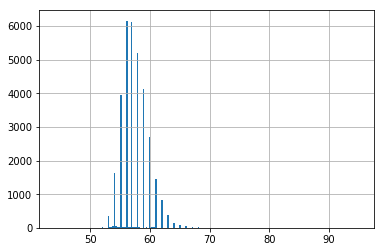

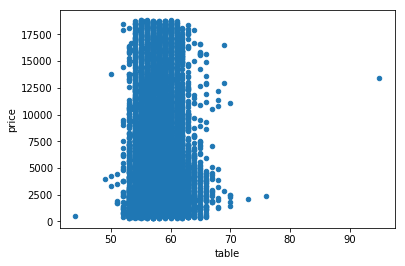

In [32]:
# Definindo os valores de Skewness e Kurtosis para analisar
# a simetria e quantidade de outliers respectivamente

print('Skewness: {}'.format(train['table'].skew()))
print('Kurtosis: {}'.format(train['table'].kurt()))

# Plotando o histograma

train['table'].hist(bins = 200)
plt.show() 


# Plotando o diagrama de dispersão

train.plot.scatter(x = 'table', y = 'price')
plt.show()

###### Removendo os Outliers

De acordo com a observação do gráfico acima, defino os outliers como sendo os pontos fora da distribuição padrão, ou seja, com table entre 51 e 67.

Skewness: 0.559049113557836
Kurtosis: 0.3236654127449512


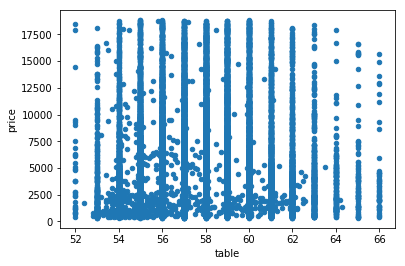

In [33]:
train = train[train['table'] > 51]
train = train[train['table'] < 67]

# Definindo os valores de Skewness e Kurtosis para analisar
# a simetria e quantidade de outliers respectivamente apos remocao

print('Skewness: {}'.format(train['table'].skew()))
print('Kurtosis: {}'.format(train['table'].kurt()))

# Plotando o diagrama de dispersão novamente

train.plot.scatter(x = 'table', y = 'price')
plt.show()

In [ ]:
# Criando os graficos de dispersao para entender a relacao polinomial entre os atributos

sns.pairplot(train, hue='price')

C:\Users\gabri\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\gabri\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\gabri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gabri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


KeyboardInterrupt: 

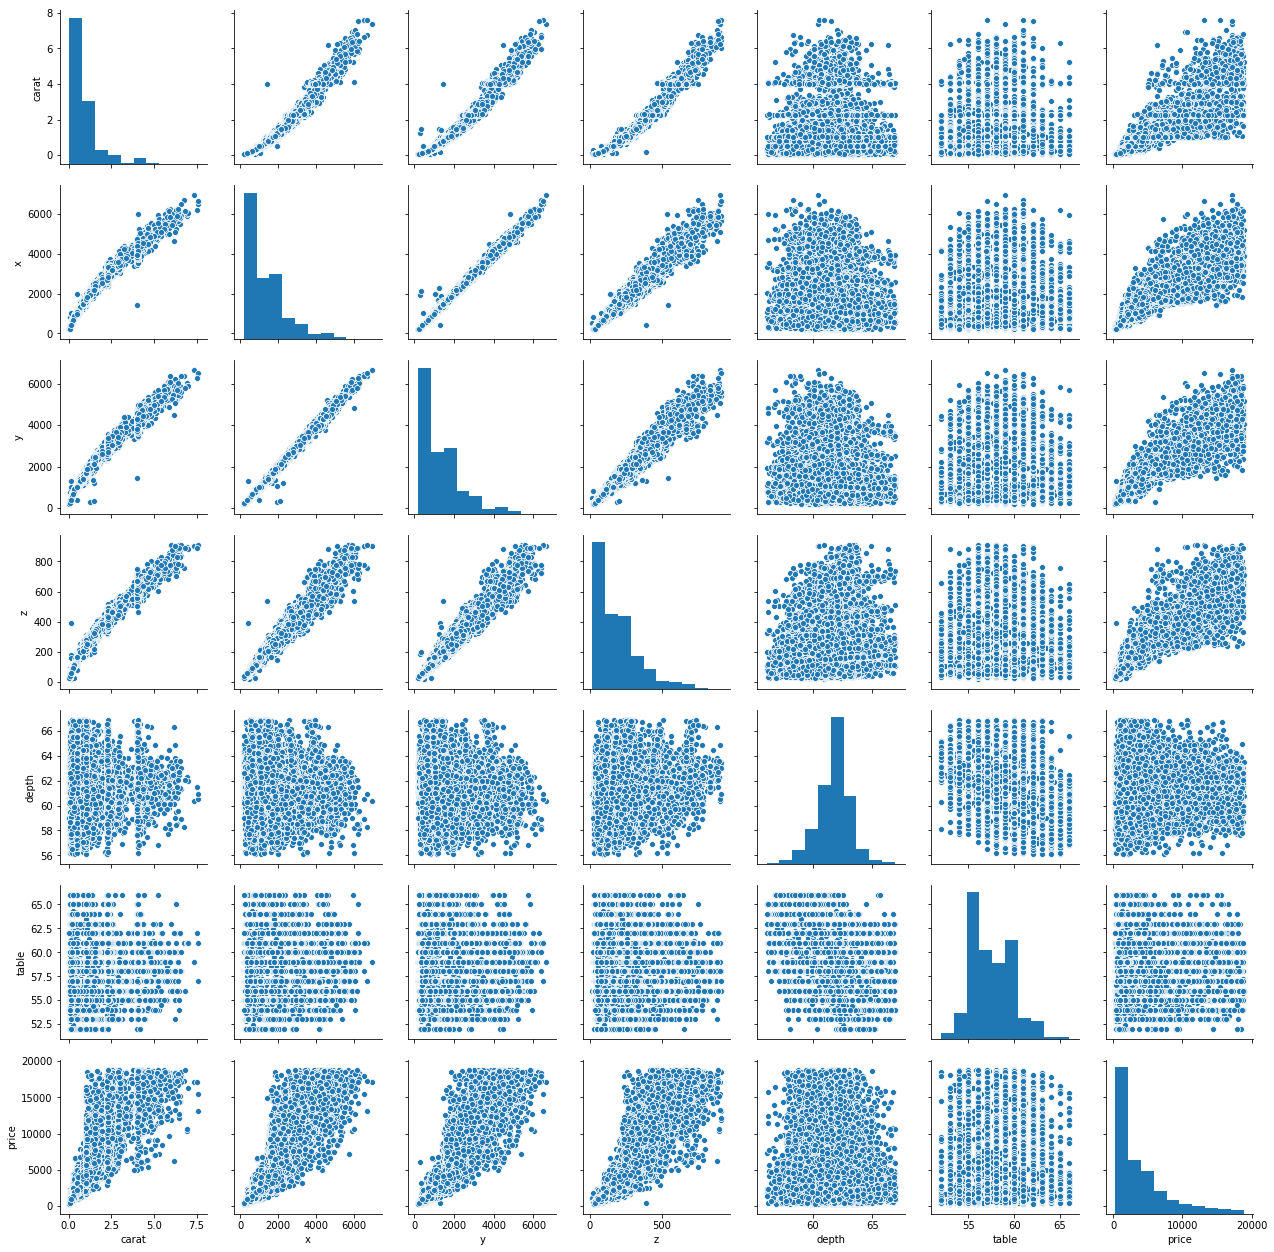

In [35]:
# Considerando a relacao quadratica entre os atributos carat, x, y, z
train_pol = train.copy()
train_pol['carat'] = np.power(train_pol['carat'], 2)
train_pol['x'] = np.power(train_pol['x'], 4)
train_pol['y'] = np.power(train_pol['y'], 4)
train_pol['z'] = np.power(train_pol['z'], 4)

test_pol = train.copy()
test_pol['carat'] = np.power(test_pol['carat'], 2)
test_pol['x'] = np.power(test_pol['x'], 4)
test_pol['y'] = np.power(test_pol['y'], 4)
test_pol['z'] = np.power(test_pol['z'], 4)

sns.pairplot(train_pol)

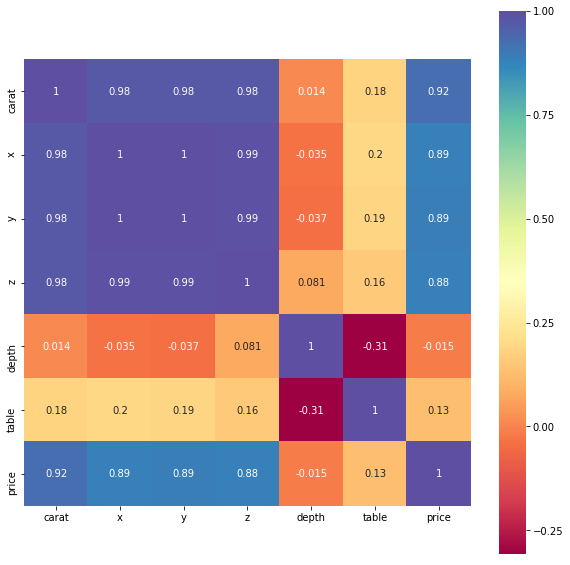

In [36]:
# Cria a matriz de correlacao entre os atributos
corr_matrix = train.corr()

plt.subplots(figsize = (10, 10))
sns.heatmap(corr_matrix, square=True, cbar=True, annot = True, cmap='Spectral')
plt.show()

Os valores de x, y, z estão bastante correlacionados entre si e tem bastante influencia sobre o preço. Desta forma, eles foram transformados em um único atributo, volume, que é um relação entre as três variáveis.

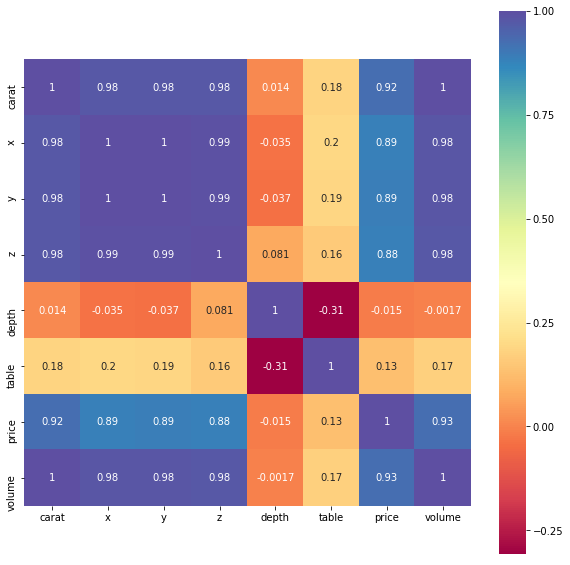

In [37]:
train['volume'] = train['x'] * train['y'] * train['z']

# Cria a matriz de correlacao entre os atributos, agora com a adicao do atributo volume
corr_matrix = train.corr()

plt.subplots(figsize = (10, 10))
sns.heatmap(corr_matrix, square=True, cbar=True, annot = True, cmap='Spectral')
plt.show()

Como pode ser observado, os atributos carat e volume tem correlação de 1, o que faz sentido, considerando que carat representa o peso em quilates de cada diamante. Será que faz sentido manter ambos os atributos?

Decidiu-se testar uma nova combinação entre x e y como demonstrado a seguir.

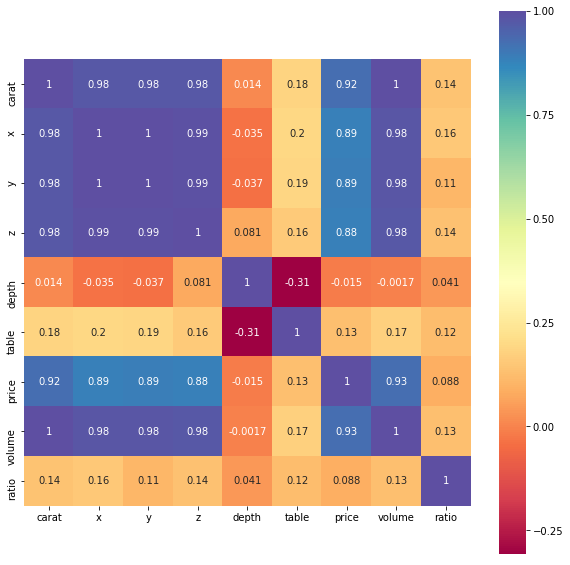

In [38]:
train['ratio'] = train['x'] / train['y']

# Cria a matriz de correlacao entre os atributos, agora com a adicao do atributo ratio
corr_matrix = train.corr()

plt.subplots(figsize = (10, 10))
sns.heatmap(corr_matrix, square=True, cbar=True, annot = True, cmap='Spectral')
plt.show()

Como o novo atributo testado não parece influenciar suficientemente o preço e o atributo de volume possui correlação unitária com carat, decidi retornar o conjunto de dados ao seu estado original. 

In [39]:
train = train.drop(['volume'], axis = 1)
train = train.drop(['ratio'], axis = 1)

train.head()

,carat,cut,color,clarity,x,y,z,depth,table,price
id,,,,,,,,,,
20000,0.35,Very Good,G,VVS2,4.44,4.48,2.80,62.8,58.0,798
20001,0.70,Ideal,F,SI1,5.66,5.69,3.55,62.6,56.0,2089
20002,0.32,Ideal,F,VVS1,4.42,4.38,2.70,61.4,56.0,990
20003,0.30,Ideal,H,VVS2,4.32,4.35,2.67,61.7,54.2,631
20004,0.33,Premium,I,VVS2,4.41,4.47,2.76,62.2,59.0,579


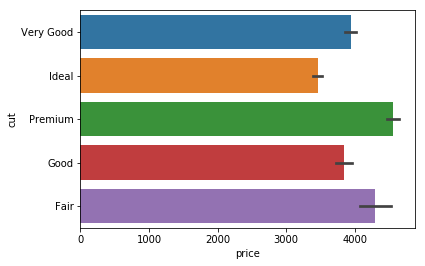

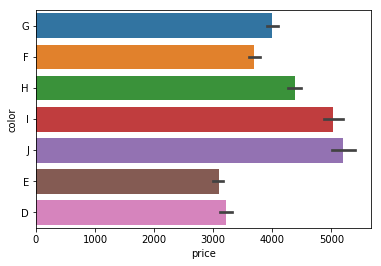

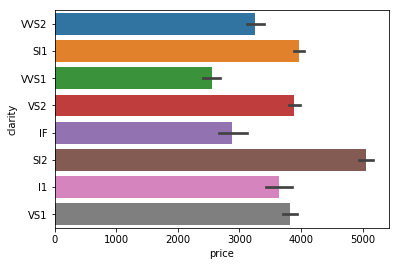

In [40]:
# Relacionando os atributos literais ao preco, com visualizacao

# Analisando a influencia de cut
sns.barplot(x = "price", y = "cut", data = train)
plt.show()

# Analisando a influencia de color
sns.barplot(x = "price", y = "color", data = train)
plt.show()

# Analisando a influencia de clarity
sns.barplot(x = "price", y = "clarity", data = train)
plt.show()

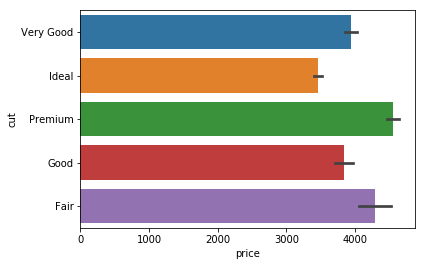

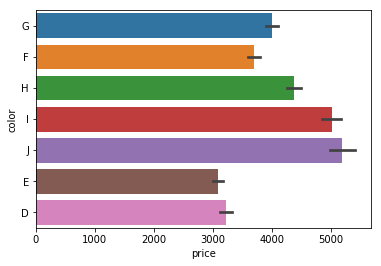

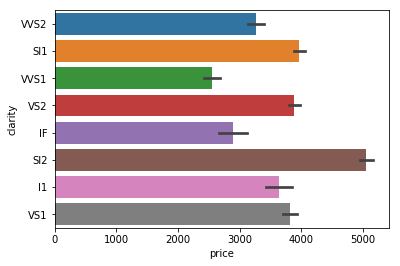

In [41]:
# Relacionando os atributos literais ao preco, com visualizacao

# Analisando a influencia de cut
sns.barplot(x = "price", y = "cut", data = train_pol)
plt.show()

# Analisando a influencia de color
sns.barplot(x = "price", y = "color", data = train_pol)
plt.show()

# Analisando a influencia de clarity
sns.barplot(x = "price", y = "clarity", data = train_pol)
plt.show()

Como pode ser observado nos gráficos acima, as opções de cada um dos atributos influenciam o preço de maneiras diferentes. As barras coloridas significam o valor estimado para cada opção e a linha ao final de cada barra informa a incerteza destas estimativas.

Por conta deste fenomeno, decidiu-se lidar com estes atributos de duas maneiras diferentes:
- Transformando cada uma destas opções em novos atributos;
- Atribuindo valores numéricos de acordo com a influência sobre o preço, valores maiores para aqueles que tem valores estimados de preço maiores.
    
A primeira opção é realizada desta forma pois os valores numéricos influenciam diretamente os modelos de regressão que utilizam os pesos relacionados a cada atributo, como a regressão linear.
A segunda opção transforma cada sub-característica em um atributo booleano e pode influenciar positivamente na maneira como os modelos funcionam.

In [42]:
# Criando novos atributos a partir das classes dos atributos literais para o conjunto de treino

# train_1 eh referente a primeira alternativa de tratamento dos atributos literais
train_1 = pd.get_dummies(train)
train_1.head()

,carat,x,y,z,depth,table,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
20000,0.35,4.44,4.48,2.80,62.8,58.0,798,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20001,0.70,5.66,5.69,3.55,62.6,56.0,2089,0,0,1,...,0,0,0,0,1,0,0,0,0,0
20002,0.32,4.42,4.38,2.70,61.4,56.0,990,0,0,1,...,0,0,0,0,0,0,0,0,1,0
20003,0.30,4.32,4.35,2.67,61.7,54.2,631,0,0,1,...,0,0,0,0,0,0,0,0,0,1
20004,0.33,4.41,4.47,2.76,62.2,59.0,579,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [43]:
# Criando novos atributos a partir das classes dos atributos literais para o conjunto de treino

# train_1 eh referente a primeira alternativa de tratamento dos atributos literais
train_pol_1 = pd.get_dummies(train_pol)
train_pol_1.head()

,carat,x,y,z,depth,table,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
20000,0.1225,388.626025,402.820956,61.465600,62.8,58.0,798,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20001,0.4900,1026.279667,1048.211851,158.823006,62.6,56.0,2089,0,0,1,...,0,0,0,0,1,0,0,0,0,0
20002,0.1024,381.670925,368.041203,53.144100,61.4,56.0,990,0,0,1,...,0,0,0,0,0,0,0,0,1,0
20003,0.0900,348.285174,358.061006,50.821215,61.7,54.2,631,0,0,1,...,0,0,0,0,0,0,0,0,0,1
20004,0.1089,378.228594,399.236365,58.027830,62.2,59.0,579,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [44]:
# Criando novos atributos a partir das classes dos atributos literais para o conjunto de teste

# test_1 eh referente a primeira alternativa de tratamento dos atributos literais
test_1 = pd.get_dummies(test)
test_1.head()

,carat,x,y,z,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,1.82,7.75,7.68,4.84,62.7,58.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1.11,6.63,6.65,4.11,61.9,58.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.52,5.19,5.22,3.20,61.5,55.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.05,6.52,6.50,4.05,62.2,56.0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.70,5.63,5.68,3.51,62.1,58.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [45]:
# Criando novos atributos a partir das classes dos atributos literais para o conjunto de teste

# test_1 eh referente a primeira alternativa de tratamento dos atributos literais
test_pol_1 = pd.get_dummies(test_pol)
test_pol_1.head()

,carat,x,y,z,depth,table,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
20000,0.1225,388.626025,402.820956,61.465600,62.8,58.0,798,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20001,0.4900,1026.279667,1048.211851,158.823006,62.6,56.0,2089,0,0,1,...,0,0,0,0,1,0,0,0,0,0
20002,0.1024,381.670925,368.041203,53.144100,61.4,56.0,990,0,0,1,...,0,0,0,0,0,0,0,0,1,0
20003,0.0900,348.285174,358.061006,50.821215,61.7,54.2,631,0,0,1,...,0,0,0,0,0,0,0,0,0,1
20004,0.1089,378.228594,399.236365,58.027830,62.2,59.0,579,0,0,0,...,1,0,0,0,0,0,0,0,0,1


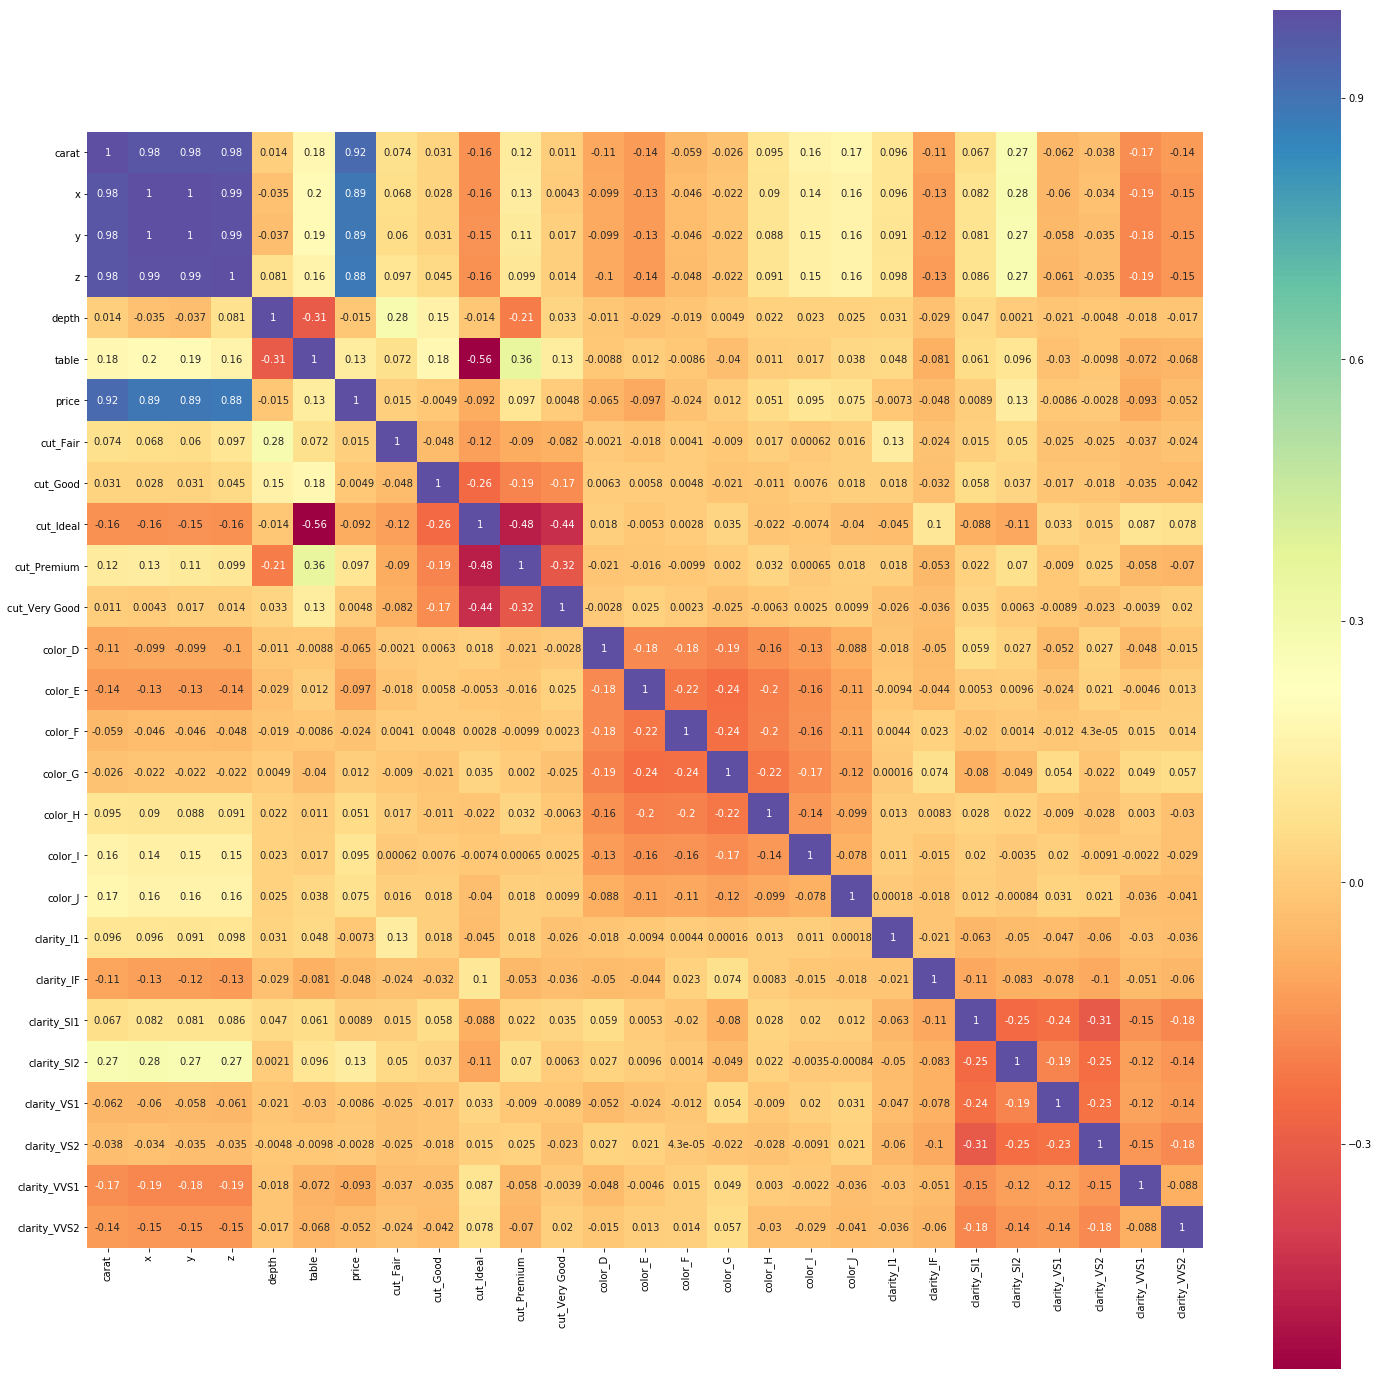

In [46]:
# Criando a matriz de correlacao para o primeiro tratamento
corr_matrix_1 = train_1.corr()

plt.subplots(figsize = (25, 25))
sns.heatmap(corr_matrix_1, square=True, cbar=True, annot = True, cmap='Spectral')
plt.show()

In [47]:
## Substituindo os valores dos atributos de acordo com a observacao acima para o conjunto de treino

# train_2 eh referente a segunda alternativa de tratamento dos atributos literais
train_2 = train.copy()

# cut
train_2['cut'] = train_2['cut'].replace({'Ideal': 1, 'Good': 2, 'Very Good': 3, 'Fair': 4, 'Premium': 5})

# color
train_2['color'] = train_2['color'].replace({'E': 1, 'D': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7})

# clarity
train_2['clarity'] = train_2['clarity'].replace({'VVS1': 1, 'IF': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, \
                                                 'SI1': 6, 'I1': 7, 'SI2': 8})

train_2.head()

,carat,cut,color,clarity,x,y,z,depth,table,price
id,,,,,,,,,,
20000,0.35,3,4,3,4.44,4.48,2.80,62.8,58.0,798
20001,0.70,1,3,6,5.66,5.69,3.55,62.6,56.0,2089
20002,0.32,1,3,1,4.42,4.38,2.70,61.4,56.0,990
20003,0.30,1,5,3,4.32,4.35,2.67,61.7,54.2,631
20004,0.33,5,6,3,4.41,4.47,2.76,62.2,59.0,579


In [48]:
## Substituindo os valores dos atributos de acordo com a observacao acima para o conjunto de treino

train_pol_2 = train_pol.copy()

# cut
train_pol_2['cut'] = train_pol_2['cut'].replace({'Ideal': 1, 'Good': 2, 'Very Good': 3, 'Fair': 4, 'Premium': 5})

# color
train_pol_2['color'] = train_pol_2['color'].replace({'E': 1, 'D': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7})

# clarity
train_pol_2['clarity'] = train_pol_2['clarity'].replace({'VVS1': 1, 'IF': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, \
                                                 'SI1': 6, 'I1': 7, 'SI2': 8})

train_pol_2.head()

,carat,cut,color,clarity,x,y,z,depth,table,price
id,,,,,,,,,,
20000,0.1225,3,4,3,388.626025,402.820956,61.465600,62.8,58.0,798
20001,0.4900,1,3,6,1026.279667,1048.211851,158.823006,62.6,56.0,2089
20002,0.1024,1,3,1,381.670925,368.041203,53.144100,61.4,56.0,990
20003,0.0900,1,5,3,348.285174,358.061006,50.821215,61.7,54.2,631
20004,0.1089,5,6,3,378.228594,399.236365,58.027830,62.2,59.0,579


In [49]:
# Substituindo os valores dos atributos de acordo com a observacao acima para o conjunto de teste

# test_2 eh referente a segunda alternativa de tratamento dos atributos literais
test_2 = test.copy()

# cut
test_2['cut'] = test_2['cut'].replace({'Ideal': 1, 'Good': 2, 'Very Good': 3, 'Fair': 4, 'Premium': 5}, inplace = False)

# color
test_2['color'] = test_2['color'].replace({'E': 1, 'D': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}, inplace = False)

# clarity
test_2['clarity'] = test_2['clarity'].replace({'VVS1': 1, 'IF': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, \
                                                 'SI1': 6, 'I1': 7, 'SI2': 8}, inplace = False)

test_2.head()

,carat,cut,color,clarity,x,y,z,depth,table
id,,,,,,,,,
0,1.82,5,4,6,7.75,7.68,4.84,62.7,58.0
1,1.11,3,5,6,6.63,6.65,4.11,61.9,58.0
2,0.52,1,2,3,5.19,5.22,3.20,61.5,55.0
3,1.05,1,6,5,6.52,6.50,4.05,62.2,56.0
4,0.70,1,6,3,5.63,5.68,3.51,62.1,58.0


In [50]:
# Substituindo os valores dos atributos de acordo com a observacao acima para o conjunto de teste


test_pol_2 = test.copy()

# cut
test_pol_2['cut'] = test_pol_2['cut'].replace({'Ideal': 1, 'Good': 2, 'Very Good': 3, 'Fair': 4, 'Premium': 5}, inplace = False)

# color
test_pol_2['color'] = test_pol_2['color'].replace({'E': 1, 'D': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}, inplace = False)

# clarity
test_pol_2['clarity'] = test_pol_2['clarity'].replace({'VVS1': 1, 'IF': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, \
                                                 'SI1': 6, 'I1': 7, 'SI2': 8}, inplace = False)

test_pol_2.head()

,carat,cut,color,clarity,x,y,z,depth,table
id,,,,,,,,,
0,1.82,5,4,6,7.75,7.68,4.84,62.7,58.0
1,1.11,3,5,6,6.63,6.65,4.11,61.9,58.0
2,0.52,1,2,3,5.19,5.22,3.20,61.5,55.0
3,1.05,1,6,5,6.52,6.50,4.05,62.2,56.0
4,0.70,1,6,3,5.63,5.68,3.51,62.1,58.0


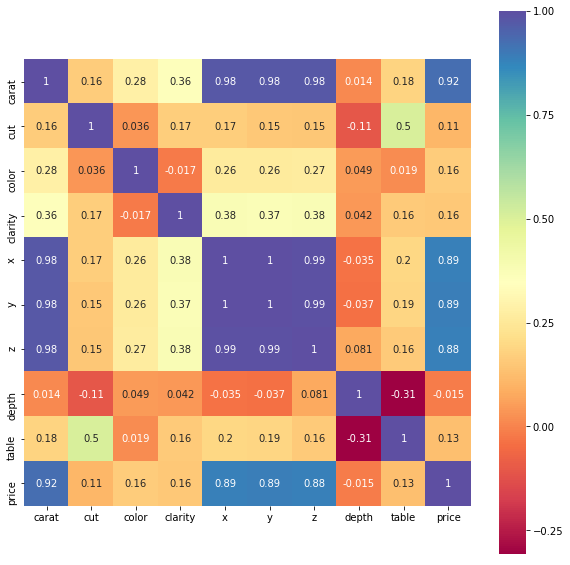

In [51]:
# Criando a matriz de correlacao para o segundo tratamento
corr_matrix_2 = train_2.corr()

plt.subplots(figsize = (10, 10))
sns.heatmap(corr_matrix_2, square=True, cbar=True, annot = True, cmap='Spectral')
plt.show()

In [52]:
# Criando o conjunto de treino e de teste a partir do conjunto da primeira alternativa

x_1 = train_1.drop(['price'], axis = 1)
y_1 = train_1['price']

x_pol_1 = train_pol_1.drop(['price'], axis = 1)
y_pol_1 = train_pol_1['price']


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, random_state = 2, test_size=0.3)

X_train_pol_1, X_test_pol_1, y_train_pol_1, y_test_pol_1 = train_test_split(x_pol_1, y_pol_1, random_state = 2, test_size=0.3)

In [53]:
# Verificando o conjunto de treino

X_train_1.head()

,carat,x,y,z,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
22296,0.60,5.41,5.33,3.39,63.1,54.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36496,0.27,4.14,4.12,2.60,63.0,56.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
51440,0.48,5.07,5.12,3.06,59.9,58.9,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34926,0.31,4.30,4.28,2.71,63.2,58.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28179,0.30,4.30,4.33,2.68,62.1,55.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
# Verificando o conjunto de teste

X_test_1.head()

,carat,x,y,z,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
32145,0.39,4.69,4.72,2.88,61.3,56.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
36561,0.70,5.69,5.75,3.49,61.0,59.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40144,0.70,5.68,5.71,3.56,62.5,55.0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
39714,0.28,4.20,4.24,2.59,61.4,56.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28144,0.70,5.72,5.77,3.53,61.4,56.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
# Criando o conjunto de treino e de teste a partir da segunda alternativa

x_2 = train_2.drop(['price'], axis = 1)
y_2 = train_2['price']

x_pol_2 = train_pol_2.drop(['price'], axis = 1)
y_pol_2 = train_pol_2['price']


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, random_state = 2, test_size=0.3)

X_train_pol_2, X_test_pol_2, y_train_pol_2, y_test_pol_2 = train_test_split(x_pol_2, y_pol_2, random_state = 2, test_size=0.3)

In [56]:
# Verificando o conjunto de treino

X_train_2.head()

,carat,cut,color,clarity,x,y,z,depth,table
id,,,,,,,,,
22296,0.60,3,2,5,5.41,5.33,3.39,63.1,54.0
36496,0.27,1,1,3,4.14,4.12,2.60,63.0,56.0
51440,0.48,3,1,5,5.07,5.12,3.06,59.9,58.9
34926,0.31,3,4,5,4.30,4.28,2.71,63.2,58.0
28179,0.30,1,5,5,4.30,4.33,2.68,62.1,55.0


In [57]:
# Verificando o conjunto de teste

X_test_2.head()

,carat,cut,color,clarity,x,y,z,depth,table
id,,,,,,,,,
32145,0.39,1,3,6,4.69,4.72,2.88,61.3,56.0
36561,0.70,3,3,5,5.69,5.75,3.49,61.0,59.0
40144,0.70,1,6,6,5.68,5.71,3.56,62.5,55.0
39714,0.28,1,1,4,4.20,4.24,2.59,61.4,56.0
28144,0.70,1,5,6,5.72,5.77,3.53,61.4,56.0


Para definir quais são os atributos mais importantes, aplica-se um algoritmo de Random Forest que, através do objeto SelectFromModel, seleciona aqueles que possuem maior peso sobre o preço.

In [58]:
# Definindo a funcao que calcula o RMSPE para comparar os erros

def rmspe_score(y_test, y_pred):

    return np.sqrt(np.mean(np.square(((y_test - y_pred) / y_test)), axis = 0))

# Inicializando listas para guardar os scores
R2_Scores_1 = []
R2_Scores_2 = []
models = ['Linear Regression', 'Lasso Regression', 'AdaBoost Regression', 'Ridge Regression',\
          'GradientBoosting Regression', 'RandomForest Regression', 'KNeighbours Regression']

#### Linear

In [59]:
# Definindo a funcao de treinamento do modelo de regressão linear
def train_lr(X_train, y_train, X_test, y_test, data):
    lr = LinearRegression()
    lr.fit(X_train , y_train)
    accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 5,verbose = 1)
    y_pred = lr.predict(X_test)
    print('')
    print('####### Linear Regression #######')
    print('Score : %.4f' % lr.score(X_test, y_test))
    print(accuracies)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)
    rmspe = rmspe_score(y_test, y_pred)

    print('')
    print('MSE   - Conjunto de dados {}'.format(data),' : %0.2f ' % mse)
    print('MAE   - Conjunto de dados {}'.format(data),' : %0.2f ' % mae)
    print('RMSE  - Conjunto de dados {}'.format(data),' : %0.2f ' % rmse)
    print('R2    - Conjunto de dados {}'.format(data),' : %0.2f ' % r2)
    print('RMSPE - Conjunto de dados {}'.format(data),' : %0.2f ' % rmspe)
    
    if data == 1:
        R2_Scores_1.append(r2)
    else:        
        R2_Scores_2.append(r2)

In [60]:
# Treinando linear para o primeiro conjunto de dados

train_lr(X_train_1, y_train_1, X_test_1, y_test_1, data = 1)


####### Linear Regression #######
Score : 0.9274
[0.92798725 0.93008724 0.92943158 0.92568179 0.92672186]

MSE   - Conjunto de dados 1  : 1150514.29 
MAE   - Conjunto de dados 1  : 707.16 
RMSE  - Conjunto de dados 1  : 1072.62 
R2    - Conjunto de dados 1  : 0.93 
RMSPE - Conjunto de dados 1  : 0.77 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [61]:
# Treinando linear para o primeiro conjunto de dados

train_lr(X_train_pol_1, y_train_pol_1, X_test_pol_1, y_test_pol_1, data = 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Linear Regression #######
Score : 0.9280
[0.92723077 0.9306867  0.92901945 0.92679655 0.92781007]

MSE   - Conjunto de dados 1  : 1139914.50 
MAE   - Conjunto de dados 1  : 708.13 
RMSE  - Conjunto de dados 1  : 1067.67 
R2    - Conjunto de dados 1  : 0.93 
RMSPE - Conjunto de dados 1  : 0.78 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [62]:
# Treinando linear para o segundo conjunto de dados

train_lr(X_train_2, y_train_2, X_test_2, y_test_2, data = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Linear Regression #######
Score : 0.9116
[0.91130691 0.91657504 0.91565547 0.91181123 0.91385793]

MSE   - Conjunto de dados 2  : 1399684.30 
MAE   - Conjunto de dados 2  : 777.51 
RMSE  - Conjunto de dados 2  : 1183.08 
R2    - Conjunto de dados 2  : 0.91 
RMSPE - Conjunto de dados 2  : 0.76 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [63]:
# Treinando linear para o segundo conjunto de dados

train_lr(X_train_pol_2, y_train_pol_2, X_test_pol_2, y_test_pol_2, data = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Linear Regression #######
Score : 0.9130
[0.91100785 0.91771261 0.9156097  0.91381439 0.91555968]

MSE   - Conjunto de dados 2  : 1378899.58 
MAE   - Conjunto de dados 2  : 778.56 
RMSE  - Conjunto de dados 2  : 1174.27 
R2    - Conjunto de dados 2  : 0.91 
RMSPE - Conjunto de dados 2  : 0.76 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


#### Lasso

In [64]:
def train_la(X_train, y_train, X_test, y_test, data):
    la = Lasso(normalize=True)
    la.fit(X_train , y_train)
    accuracies = cross_val_score(estimator = la, X = X_train, y = y_train, cv = 5,verbose = 1)
    y_pred = la.predict(X_test)
    print('')
    print('###### Lasso Regression ######')
    print('Score : %.4f' % la.score(X_test, y_test))
    print(accuracies)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)
    rmspe = rmspe_score(y_test, y_pred)

    print('')
    print('MSE   - Conjunto de dados {}'.format(data),' : %0.2f ' % mse)
    print('MAE   - Conjunto de dados {}'.format(data),' : %0.2f ' % mae)
    print('RMSE  - Conjunto de dados {}'.format(data),' : %0.2f ' % rmse)
    print('R2    - Conjunto de dados {}'.format(data),' : %0.2f ' % r2)
    print('RMSPE - Conjunto de dados {}'.format(data),' : %0.2f ' % rmspe)
    
    if data == 1:
        R2_Scores_1.append(r2)
    else:        
        R2_Scores_2.append(r2)

In [65]:
# Treinando lasso para o primeiro conjunto de dados

train_la(X_train_1, y_train_1, X_test_1, y_test_1, data = 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished



###### Lasso Regression ######
Score : 0.8935
[0.90042177 0.89832606 0.9031389  0.89371338 0.89732497]

MSE   - Conjunto de dados 1  : 1686860.40 
MAE   - Conjunto de dados 1  : 829.29 
RMSE  - Conjunto de dados 1  : 1298.79 
R2    - Conjunto de dados 1  : 0.89 
RMSPE - Conjunto de dados 1  : 0.49 


In [66]:
# Treinando lasso para o primeiro conjunto de dados

train_la(X_train_pol_1, y_train_pol_1, X_test_pol_1, y_test_pol_1, data = 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Lasso Regression ######
Score : 0.9040
[0.9065705  0.90971626 0.91074674 0.90455757 0.90596385]

MSE   - Conjunto de dados 1  : 1520095.27 
MAE   - Conjunto de dados 1  : 705.01 
RMSE  - Conjunto de dados 1  : 1232.92 
R2    - Conjunto de dados 1  : 0.90 
RMSPE - Conjunto de dados 1  : 0.34 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [67]:
# Treinando lasso para o segundo conjunto de dados

train_la(X_train_2, y_train_2, X_test_2, y_test_2, data = 2)


###### Lasso Regression ######
Score : 0.8955
[0.89882114 0.89897651 0.90314562 0.89439623 0.89930118]

MSE   - Conjunto de dados 2  : 1656066.80 
MAE   - Conjunto de dados 2  : 834.28 
RMSE  - Conjunto de dados 2  : 1286.88 
R2    - Conjunto de dados 2  : 0.90 
RMSPE - Conjunto de dados 2  : 0.59 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [68]:
# Treinando lasso para o segundo conjunto de dados

train_la(X_train_pol_2, y_train_pol_2, X_test_pol_2, y_test_pol_2, data = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Lasso Regression ######
Score : 0.9047
[0.90408989 0.90938057 0.90932839 0.90450382 0.90688792]

MSE   - Conjunto de dados 2  : 1509790.86 
MAE   - Conjunto de dados 2  : 724.97 
RMSE  - Conjunto de dados 2  : 1228.74 
R2    - Conjunto de dados 2  : 0.90 
RMSPE - Conjunto de dados 2  : 0.43 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


#### AdaBoost

In [69]:
# def train_ar(X_train, y_train, X_test, y_test, data):
#     ar = AdaBoostRegressor(n_estimators=1000)
#     ar.fit(X_train , y_train)
#     accuracies = cross_val_score(estimator = ar, X = X_train, y = y_train, cv = 5,verbose = 1)
#     y_pred = ar.predict(X_test)
#     print('')
#     print('###### AdaBoost Regression ######')
#     print('Score : %.4f' % ar.score(X_test, y_test))
#     print(accuracies)

#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     rmse = mean_squared_error(y_test, y_pred)**0.5
#     r2 = r2_score(y_test, y_pred)
#     rmspe = rmspe_score(y_test, y_pred)

#     print('')
#     print('MSE   - Conjunto de dados {}'.format(data),' : %0.2f ' % mse)
#     print('MAE   - Conjunto de dados {}'.format(data),' : %0.2f ' % mae)
#     print('RMSE  - Conjunto de dados {}'.format(data),' : %0.2f ' % rmse)
#     print('R2    - Conjunto de dados {}'.format(data),' : %0.2f ' % r2)
#     print('RMSPE - Conjunto de dados {}'.format(data),' : %0.2f ' % rmspe)

In [70]:
# # Treinando adaboost para o primeiro conjunto de dados

# train_ar(X_train_1, y_train_1, X_test_1, y_test_1, data = 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished



###### AdaBoost Regression ######
Score : 0.7042
[0.821503   0.75281313 0.8069983  0.81131627 0.69847361]

MSE   - Conjunto de dados 1  : 4685908.85 
MAE   - Conjunto de dados 1  : 2005.54 
RMSE  - Conjunto de dados 1  : 2164.70 
R2    - Conjunto de dados 1  : 0.70 
RMSPE - Conjunto de dados 1  : 2.12 


In [71]:
# # Treinando adaboost para o primeiro conjunto de dados

# train_ar(X_train_pol_1, y_train_pol_1, X_test_pol_1, y_test_pol_1, data = 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished



###### AdaBoost Regression ######
Score : 0.7097
[0.86687394 0.75926941 0.71290702 0.86814215 0.70594086]

MSE   - Conjunto de dados 1  : 4598686.23 
MAE   - Conjunto de dados 1  : 1993.42 
RMSE  - Conjunto de dados 1  : 2144.45 
R2    - Conjunto de dados 1  : 0.71 
RMSPE - Conjunto de dados 1  : 2.08 


In [72]:
# # Treinando adaboost para o segundo conjunto de dados

# train_ar(X_train_2, y_train_2, X_test_2, y_test_2, data = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min finished



###### AdaBoost Regression ######
Score : 0.7048
[0.80259823 0.7214188  0.84450166 0.72443325 0.70828278]

MSE   - Conjunto de dados 2  : 4675829.90 
MAE   - Conjunto de dados 2  : 1952.46 
RMSE  - Conjunto de dados 2  : 2162.37 
R2    - Conjunto de dados 2  : 0.70 
RMSPE - Conjunto de dados 2  : 2.46 


In [73]:
# Treinando adaboost para o segundo conjunto de dados

train_ar(X_train_pol_2, y_train_pol_2, X_test_pol_2, y_test_pol_2, data = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min finished



###### AdaBoost Regression ######
Score : 0.7272
[0.80663267 0.72347714 0.84393417 0.74232631 0.70849346]

MSE   - Conjunto de dados 2  : 4321945.45 
MAE   - Conjunto de dados 2  : 1870.16 
RMSE  - Conjunto de dados 2  : 2078.93 
R2    - Conjunto de dados 2  : 0.73 
RMSPE - Conjunto de dados 2  : 2.33 


#### Random Forest

In [74]:
def train_rf(X_train, y_train, X_test, y_test, data):
    rf = RandomForestRegressor(n_jobs = -1, n_estimators = 250, random_state = 2)
    rf.fit(X_train , y_train)
    accuracies = cross_val_score(n_jobs = -1, estimator = rf, X = X_train, y = y_train, cv = 5,verbose = 1)
    y_pred = rf.predict(X_test)
    print('')
    print('###### Random Forest ######')
    print('Score : %.4f' % rf.score(X_test, y_test))
    print(accuracies)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)
    rmspe = rmspe_score(y_test, y_pred)

    print('')
    print('MSE   - Conjunto de dados {}'.format(data),' : %0.2f ' % mse)
    print('MAE   - Conjunto de dados {}'.format(data),' : %0.2f ' % mae)
    print('RMSE  - Conjunto de dados {}'.format(data),' : %0.2f ' % rmse)
    print('R2    - Conjunto de dados {}'.format(data),' : %0.4f ' % r2)
    print('RMSPE - Conjunto de dados {}'.format(data),' : %0.4f ' % rmspe)

In [75]:
# Treinando random forest para o primeiro conjunto de dados

train_rf(X_train_1, y_train_1, X_test_1, y_test_1, data = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.0s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.3s finished



###### Random Forest ######
Score : 0.9812
[0.97731817 0.98270247 0.98013952 0.97989949 0.97963437]

MSE   - Conjunto de dados 1  : 297731.08 
MAE   - Conjunto de dados 1  : 276.90 
RMSE  - Conjunto de dados 1  : 545.65 
R2    - Conjunto de dados 1  : 0.9812 
RMSPE - Conjunto de dados 1  : 0.0997 


In [76]:
# Treinando random forest para o primeiro conjunto de dados

train_rf(X_train_pol_1, y_train_pol_1, X_test_pol_1, y_test_pol_1, data = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.0s remaining:   27.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.5s finished



###### Random Forest ######
Score : 0.9812
[0.97732166 0.98268612 0.9801661  0.97994941 0.97953979]

MSE   - Conjunto de dados 1  : 297814.12 
MAE   - Conjunto de dados 1  : 276.88 
RMSE  - Conjunto de dados 1  : 545.72 
R2    - Conjunto de dados 1  : 0.9812 
RMSPE - Conjunto de dados 1  : 0.0996 


In [77]:
# Treinando random forest para o segundo conjunto de dados

train_rf(X_train_2, y_train_2, X_test_2, y_test_2, data = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.4s remaining:   45.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.7s finished



###### Random Forest ######
Score : 0.9819
[0.97752739 0.98271601 0.98097323 0.98013067 0.98026741]

MSE   - Conjunto de dados 2  : 286969.27 
MAE   - Conjunto de dados 2  : 273.04 
RMSE  - Conjunto de dados 2  : 535.70 
R2    - Conjunto de dados 2  : 0.9819 
RMSPE - Conjunto de dados 2  : 0.0961 


In [78]:
# Treinando random forest para o segundo conjunto de dados

train_rf(X_train_pol_2, y_train_pol_2, X_test_pol_2, y_test_pol_2, data = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.9s remaining:   46.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.3s finished



###### Random Forest ######
Score : 0.9819
[0.97748212 0.98268847 0.98099238 0.98013166 0.98032426]

MSE   - Conjunto de dados 2  : 287256.53 
MAE   - Conjunto de dados 2  : 273.06 
RMSE  - Conjunto de dados 2  : 535.96 
R2    - Conjunto de dados 2  : 0.9819 
RMSPE - Conjunto de dados 2  : 0.0961 


In [79]:
# x = train_2.drop(['price'], axis = 1)
# y = train_2['price']

# rf = RandomForestRegressor(n_jobs = -1, n_estimators = 250, random_state = 2)
# rf.fit(x, y)
# y_pred = rf.predict(test_2)

# submission = pd.DataFrame({'id':test_2.index, 'price':y_pred})
# submission.head()

# submission.to_csv('data/submission.csv', index = False)